In [1]:
!pip install xgboost
import pandas as pd
data=pd.read_excel(r'C:\Users\Vasu\OneDrive\Documents\ISE 298\I5_data.xlsx')
df=data.copy()
df.head()

,Hour,VMT (Veh-Miles),VHT (Veh-Hours),# Lane Points,% Observed
0,2022-01-01 00:00:00,342798.4,5086.8,22536,59.2
1,2022-01-01 01:00:00,355888.7,5280.3,22536,59.1
2,2022-01-01 02:00:00,268320.9,3952.9,22536,59.0
3,2022-01-01 03:00:00,202799.2,2996.2,22536,58.8
4,2022-01-01 04:00:00,200050.5,2967.5,22536,58.7


In [2]:
df.isnull().sum()

Hour               0
VMT (Veh-Miles)    0
VHT (Veh-Hours)    0
# Lane Points      0
% Observed         0
dtype: int64

In [3]:
df.describe()

,VMT (Veh-Miles),VHT (Veh-Hours),# Lane Points,% Observed
count,9.503000e+03,9503.000000,9503.000000,9503.000000
mean,1.029402e+06,17518.131685,22827.010313,53.191255
std,4.788507e+05,9169.905722,160.492319,9.464110
min,1.444252e+05,2129.400000,22268.000000,0.000000
25%,5.294105e+05,7937.850000,22776.000000,50.000000
50%,1.201833e+06,19695.400000,22848.000000,54.000000
75%,1.433530e+06,25110.750000,22956.000000,59.400000
max,1.861498e+06,37685.100000,22992.000000,64.700000


In [4]:
# Data Transformation
from sklearn.preprocessing import OneHotEncoder
df['Hour'] = pd.to_datetime(df['Hour'])
df['Day']=df['Hour'].dt.day_name()
df['Month']=df['Hour'].dt.month
df['Time'] = df['Hour'].dt.hour
day_dict = {'Monday': 1, 'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
df['WeekDay'] = df['Day'].map(day_dict)

data_1=df.copy()
data_1.head()


,Hour,VMT (Veh-Miles),VHT (Veh-Hours),# Lane Points,% Observed,Day,Month,Time,WeekDay
0,2022-01-01 00:00:00,342798.4,5086.8,22536,59.2,Saturday,1,0,6
1,2022-01-01 01:00:00,355888.7,5280.3,22536,59.1,Saturday,1,1,6
2,2022-01-01 02:00:00,268320.9,3952.9,22536,59.0,Saturday,1,2,6
3,2022-01-01 03:00:00,202799.2,2996.2,22536,58.8,Saturday,1,3,6
4,2022-01-01 04:00:00,200050.5,2967.5,22536,58.7,Saturday,1,4,6


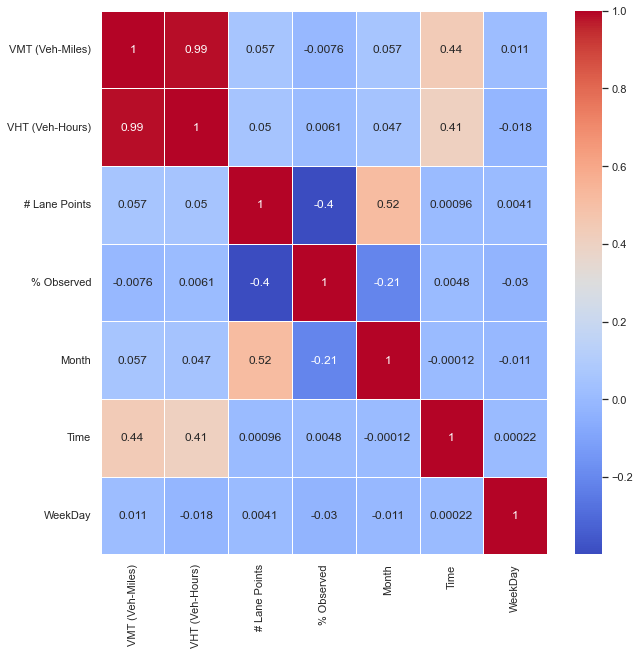

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data_1.corr()
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr, annot=True,linewidths=0.5, cmap='coolwarm')
plt.show()

           VMT (Veh-Miles)  VHT (Veh-Hours)  # Lane Points  % Observed  \
Day                                                                      
Monday        9.982685e+05     16825.469956   22826.755117   53.007091   
Tuesday       9.936955e+05     17142.583836   22824.088362   53.115805   
Wednesday     1.021701e+06     17703.477412   22825.304094   53.288377   
Thursday      1.062223e+06     18562.358712   22830.238636   54.217727   
Friday        1.146456e+06     20109.409848   22829.672727   54.728939   
Saturday      1.032488e+06     17081.905675   22826.562500   52.320043   
Sunday        9.554626e+05     15303.039092   22826.711095   51.740879   

              Month       Time  WeekDay  
Day                                      
Monday     5.929825  11.500000      1.0  
Tuesday    5.913793  11.500000      2.0  
Wednesday  6.017544  11.500000      3.0  
Thursday   5.945455  11.500000      4.0  
Friday     6.036364  11.500000      5.0  
Saturday   5.896552  11.500000      6.0

Text(0.5, 1.0, 'VMT vs Hour')

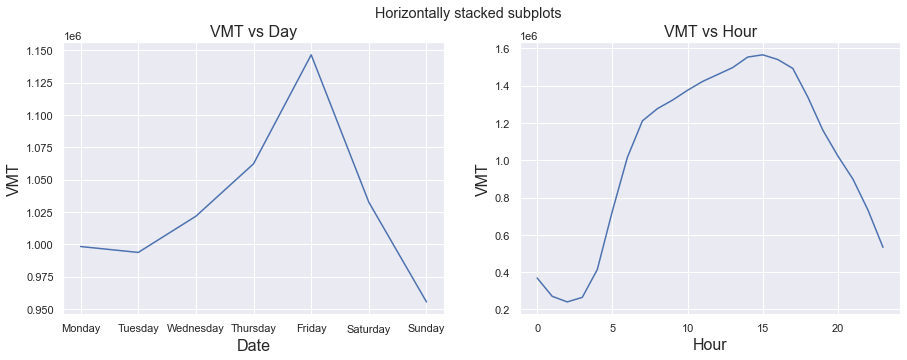

In [14]:
data_2 = data_1.groupby(['Day']).mean()
data_3 = data_1.groupby(['Time']).mean()

df2=data_2.sort_values("WeekDay")
print(df2.head(7))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(df2["VMT (Veh-Miles)"])
ax1.set_xlabel('Date',fontsize=16)
ax1.set_ylabel('VMT',fontsize=16)
ax1.set_title("VMT vs Day",fontsize=16)
ax2.plot(data_3["VMT (Veh-Miles)"])
ax2.set_xlabel('Hour',fontsize=16)
ax2.set_ylabel('VMT',fontsize=16)
ax2.set_title("VMT vs Hour",fontsize=16)

In [ ]:
data_1["VMT (Veh-Miles)"] = data_1["VMT (Veh-Miles)"] * 10**-5
data_1["VHT (Veh-Hours)"] = data_1["VHT (Veh-Hours)"] * 10**-3
train = data_1.head(8759)
test = data_1.drop(train.index)
test["Hour"]

In [ ]:
y_train = train["VMT (Veh-Miles)"]
x_train = train.drop(["VMT (Veh-Miles)","Hour","Day"], axis =1)
x_test = test.drop(["VMT (Veh-Miles)","Hour","Day"], axis =1)
y_test = test["VMT (Veh-Miles)"]

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
LR= LinearRegression()
LR.fit(x_train,y_train)
LR_predicted = LR.predict(x_test)
LR_train = LR.predict(x_train)
print("Linear Regression\n","Training Data")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train,LR_train)):.4f}",f" R2 : {r2_score(y_train,LR_train):.4f}")
print(" Test Data")
print(f"MAE : {mean_absolute_error(y_test, LR_predicted):.4f}",f"RMSE : {np.sqrt(mean_squared_error(y_test, LR_predicted)):.4f}",f" R2 : {r2_score(y_test, LR_predicted):.4f}")

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.figsize'] = (20, 6)
X = test["Hour"]
Y1 = y_test
Y2 = LR_predicted
E =Y1-Y2


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 2, 7)}
# Perform Grid Search Cross Validation to find the optimal lambda value
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_lambda = grid_search.best_params_['alpha']
print(f"Optimal lambda: {best_lambda:.3f}")

# Train the Ridge Regression model with the optimal lambda value
ridge = Ridge(alpha=best_lambda)
ridge.fit(x_train, y_train)
# Make predictions on the training set
y_train_ridge = ridge.predict(x_train)
# Make predictions on the test set
y_pred_ridge = ridge.predict(x_test)

# Calculate the Root Mean Squared Error (RMSE) and R-squarered values of test and train models
print("Ridge Regression\n","Training Data")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train,y_train_ridge)):.4f}",f" R2 : {r2_score(y_train,y_train_ridge):.4f}")
print(" Test Data")
print(f"MAE : {mean_absolute_error(y_test, y_pred_ridge):.4f}",f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}",f" R2 : {r2_score(y_test, y_pred_ridge):.4f}")
X = test["Hour"]
YR1 = y_test
YR2 = y_pred_ridge
E_R = YR1 - YR2


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

# Define the parameter grid for lambda
param_grid = {'alpha': np.logspace(-4, 2, 7)}

# Create the Lasso Regression model
lasso = Lasso()

# Perform Grid Search Cross Validation to find the optimal lambda value
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_lambda = grid_search.best_params_['alpha']
print(f"Optimal lambda: {best_lambda:.3f}")

# Train the Lasso Regression model with the optimal lambda value
lasso = Lasso(alpha=best_lambda)
lasso.fit(x_train, y_train)
# Make predictions on the training set
y_train_lasso = lasso.predict(x_train)
# Make predictions on the test set
y_pred_lasso = lasso.predict(x_test)

# Calculate the Root Mean Squared Error (RMSE) and R-squarered values of test and train models
print("Lasso Regression\n","Training Data")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train,y_train_lasso)):.4f}",f" R2 : {r2_score(y_train,y_train_lasso):.4f}")
print(" Test Data")
print(f"MAE : {mean_absolute_error(y_test, y_pred_lasso):.4f}",f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}",f" R2 : {r2_score(y_test, y_pred_lasso):.4f}")
X = test["Hour"]
YL1 = y_test
YL2 = y_pred_lasso
E_L = YL1 - YL2



In [ ]:
E = Y2-Y1
fig, ax = plt.subplots()
# Plot the actual and predicted values
ax.plot(X, Y1, 'b-', label='Actual')
ax.plot(X, Y2, 'm-', label='Linear')
ax.plot(X, YL2, 'r-', label='Lasso')
ax.plot(X, YR2, 'g-', label='Ridge')
ax.plot(X, E, 'c-', label='Error')
# Set the x-label and y-label of the plot
ax.set_xlabel('Date-Time')
ax.set_ylabel('VMT')
# Add a title and legend to the plot
ax.set_title('Regression models - Actual vs Predicted')
ax.legend()
# Display the plot
plt.show()


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#model = RandomForestRegressor()
#param_grid = {
#    'n_estimators': np.arange(100, 1000, 100),
#    'max_depth': [None, 5, 10, 15],
#    'min_samples_split': np.arange(2, 10),
#    'min_samples_leaf': np.arange(1, 5),
#    'max_features': ['auto', 'sqrt']
#}
#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=10)

# Fit the data to find the best hyperparameters
#random_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
#print("Best Hyperparameters: ", random_search.best_params_)
#print("Best Score: ", random_search.best_score_)
rf = RandomForestRegressor(n_estimators=500,min_samples_split=6, min_samples_leaf=2,max_features='auto', max_depth=None, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_train_rf = rf.predict(x_train)
Y_RF1 = y_test
Y_RF2 = y_pred_rf
E_RF = Y_RF1 - Y_RF2
# Calculate the Root Mean Squared Error (RMSE) and R-squarered values of test and train models
print("Random Forest Regressor\n","Training Data")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train,y_train_rf)):.4f}",f" R2 : {r2_score(y_train,y_train_rf):.4f}")
print(" Test Data")
print(f"MAE : {mean_absolute_error(y_test,y_pred_rf):.4f}",f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_rf)):.4f}",f" R2 : {r2_score(y_test,y_pred_rf):.4f}")


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#model = xgb.XGBRegressor()


#param_grid = {
   # 'max_depth': [3, 5, 7],
  #  'learning_rate': [0.1, 0.01, 0.001],
 #   'n_estimators': [100, 200, 300]
#}
#XGB_optimal = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
#XGB_optimal.fit(x_train, y_train)
#print("Best Parameters:", XGB_optimal.best_params_)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100)

# Fit the model
xg_reg.fit(x_train,y_train)

# Predict the target variable on the test set
preds = xg_reg.predict(x_test)

# Calculate the RMSE
print(f"MAE : {mean_absolute_error(y_test, preds):.4f}",f"RMSE : {np.sqrt(mean_squared_error(y_test, preds)):.4f}",f" R2 : {r2_score(y_test, preds):.4f}")
YX1=y_test
YX2 = preds
E_X =YX1-YX2
# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X, Y1, Y2, Y3, Y4, Y5, and Y6 arrays defined

# Create a figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Plot lines on the first subplot (axs[0,0])
axs[0, 0].plot(X, Y1, 'r-', label='Actual')
axs[0, 0].plot(X, Y2, 'b-', label='prediced')
axs[0, 0].plot(X, E, 'c-', label='Error')
axs[0, 0].set_xlabel('Date',fontsize=16)
axs[0, 0].set_ylabel('VMT',fontsize=16)
axs[0, 0].set_title("Linear regression",fontsize=16)
axs[0, 0].legend()

# Plot lines on the second subplot (axs[0,1])
axs[0, 1].plot(X, YR1, 'r-', label='Actual')
axs[0, 1].plot(X, YR2, 'b-', label='Predicted')
axs[0, 1].plot(X, E_R, 'c-', label='Error')
axs[0, 1].set_xlabel('Date',fontsize=16)
axs[0, 1].set_ylabel('VMT',fontsize=16)
axs[0, 1].set_title("Ridge regression",fontsize=16)
axs[0, 1].legend()

# Plot lines on the third subplot (axs[1,0])
axs[1, 0].plot(X, YL1, 'r-', label='Actual')
axs[1, 0].plot(X, YL2, 'b-', label='Predicted')
axs[1, 0].plot(X, E_L, 'c-', label='Error')
axs[1, 0].set_xlabel('Date',fontsize=16)
axs[1, 0].set_ylabel('VMT',fontsize=16)
axs[1, 0].set_title("Lasso regression",fontsize=16)
axs[1, 0].legend()


# Plot lines on the fourth subplot (axs[1,1])
axs[1, 1].plot(X, Y_RF1, 'r-', label='Actual')
axs[1, 1].plot(X, Y_RF2, 'b-', label='Predicted')
axs[1, 1].plot(X, E_RF, 'c-', label='Error')
axs[1, 1].set_xlabel('Date',fontsize=16)
axs[1, 1].set_ylabel('VMT',fontsize=16)
axs[1, 1].set_title("Random Forest",fontsize=16)
axs[1, 1].legend()


# Hide the fifth subplot (axs[2,0])
axs[2, 0].plot(X, YX1, 'r-', label='Actual')
axs[2, 0].plot(X, YX2, 'b-', label='Predicted')
axs[2, 0].plot(X, E_X, 'c-', label='Error')
axs[2, 0].set_xlabel('Date',fontsize=16)
axs[2, 0].set_ylabel('VMT',fontsize=16)
axs[2, 0].set_title("XGBoost",fontsize=16)
axs[2, 0].legend()


# Hide the sixth subplot (axs[2,1])
axs[2, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
